# Recommender System
### Recommend a electronics item based on their most review and interest.

Import all necessary libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

C:\Users\Manikandan Muthiah\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
columns=['item_id','user_id','rating','timestamp','model_attr','category','brand','year','user_attr','split']
df=pd.read_csv('C://Users//Manikandan Muthiah//Downloads//electronics.csv',sep=',',names=columns,skiprows=1)

In [4]:
df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


## Exploratory Data analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

C:\Users\Manikandan Muthiah\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
df.groupby('brand')['rating'].mean().sort_values(ascending=False).head()

brand
Plemo           4.589099
Savage          4.534591
Fintie          4.514004
Tiamat          4.498274
Cooper Cases    4.389262
Name: rating, dtype: float64

In [7]:
df.groupby('brand')['rating'].count().sort_values(ascending=False).head()

brand
Bose        29222
Logitech    29203
Sony        20360
Mpow        17477
EldHus      16530
Name: rating, dtype: int64

In [8]:
ratings=pd.DataFrame(df.groupby('brand')['rating'].mean())
ratings.head()

,rating
brand,
Apple,4.374979
Archos,3.257024
Bose,4.285983
Canon,4.274752
Cooper Cases,4.389262


In [9]:
ratings['num_of_ratings']=pd.DataFrame(df.groupby('brand')['rating'].count())
ratings.head()

,rating,num_of_ratings
brand,,
Apple,4.374979,6027
Archos,3.257024,961
Bose,4.285983,29222
Canon,4.274752,6959
Cooper Cases,4.389262,745


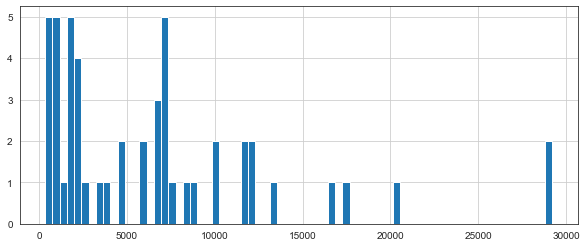

In [10]:
plt.figure(figsize=(10,4))
ratings['num_of_ratings'].hist(bins=70)

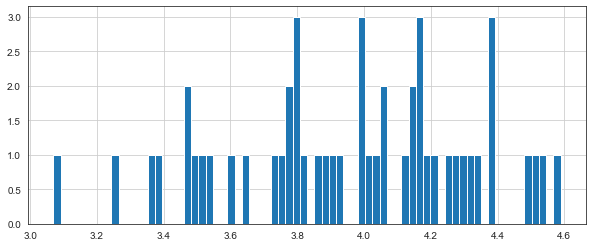

In [11]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

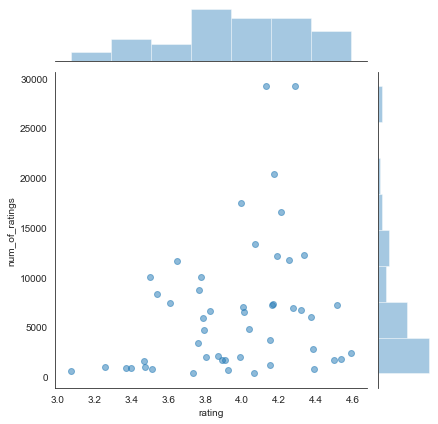

In [12]:
sns.jointplot(x='rating',y='num_of_ratings',data=ratings,alpha=0.5)

### Recommending electronics

In [13]:
electmat=df.pivot_table(index='user_id',columns='brand',values='rating')
electmat.head()

brand,Apple,Archos,Bose,Canon,Cooper Cases,DBPOWER,DURAGADGET,EINCAR,EldHus,Etre Jeune,...,Sony,TaoTronics,Tiamat,Toshiba,Uniden,ViewSonic,Vivitar,XShields,ebasy,iRULU
user_id,,,,,,,,,,,,,,,,,,,,,
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ratings.sort_values('num_of_ratings',ascending=False).head(10)

,rating,num_of_ratings
brand,,
Bose,4.285983,29222
Logitech,4.130843,29203
Sony,4.170432,20360
Mpow,3.991017,17477
EldHus,4.210889,16530
Sennheiser,4.066807,13322
Fujifilm,4.332544,12245
TaoTronics,4.186969,12125
Etre Jeune,4.254403,11753


In [15]:
Bose_user_rating=electmat['Bose']
Bose_user_rating.head()

user_id
14    NaN
28    4.0
42    NaN
62    NaN
63    NaN
Name: Bose, dtype: float64

In [16]:
Logitech_user_rating=electmat['Logitech']
Logitech_user_rating.head()

user_id
14   NaN
28   NaN
42   NaN
62   NaN
63   NaN
Name: Logitech, dtype: float64

In [17]:
similar_to_Bosh=electmat.corrwith(Bose_user_rating)
similar_to_logitech=electmat.corrwith(Logitech_user_rating)

C:\Users\Manikandan Muthiah\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Manikandan Muthiah\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [18]:
corr_bosh=pd.DataFrame(similar_to_Bosh,columns=['Correlation'])
corr_bosh.dropna(inplace=True)
corr_bosh.head()

,Correlation
brand,
Apple,0.297864
Archos,0.497673
Bose,1.000000
Canon,0.041359
Cooper Cases,0.522233


In [19]:
corr_logitech=pd.DataFrame(similar_to_logitech,columns=['Correlation'])
corr_logitech.dropna(inplace=True)
corr_logitech.head()

,Correlation
brand,
Apple,0.001250
Archos,0.887625
Bose,0.218788
Canon,0.094167
Cooper Cases,1.000000


In [20]:
corr_bosh.sort_values('Correlation',ascending=False).head(10)

,Correlation
brand,
iRULU,1.000000
Bose,1.000000
Gary Fong,0.967620
ViewSonic,0.761047
DURAGADGET,0.755929
Polaroid,0.641250
LSS,0.551677
Cooper Cases,0.522233
Archos,0.497673


In [21]:
corr_logitech.sort_values('Correlation',ascending=False).head(10)

,Correlation
brand,
Logitech,1.000000
Cooper Cases,1.000000
Archos,0.887625
Plemo,0.708969
iRULU,0.693375
DURAGADGET,0.674200
JVC,0.594089
Vivitar,0.564076
Olympus,0.447367


In [22]:
corr_bosh=corr_bosh.join(ratings['num_of_ratings'])
corr_bosh.head()

,Correlation,num_of_ratings
brand,,
Apple,0.297864,6027
Archos,0.497673,961
Bose,1.000000,29222
Canon,0.041359,6959
Cooper Cases,0.522233,745


In [23]:
corr_bosh[corr_bosh['num_of_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num_of_ratings
brand,,
iRULU,1.000000,991
Bose,1.000000,29222
Gary Fong,0.967620,1203
ViewSonic,0.761047,3426
DURAGADGET,0.755929,419


In [24]:
corr_logitech=corr_logitech.join(ratings['num_of_ratings'])

In [25]:
corr_logitech[corr_logitech['num_of_ratings']>50].sort_values('Correlation',ascending=False).head()

,Correlation,num_of_ratings
brand,,
Logitech,1.000000,29203
Cooper Cases,1.000000,745
Archos,0.887625,961
Plemo,0.708969,2385
iRULU,0.693375,991


In [26]:
apple_user_rating=electmat['Apple']
similar_to_apple=electmat.corrwith(apple_user_rating)
corr_apple=pd.DataFrame(similar_to_apple,columns=['Correlation'])
corr_apple.dropna(inplace=True)
corr_apple=corr_apple.join(ratings['num_of_ratings'])
corr_apple[corr_apple['num_of_ratings']>100].sort_values('Correlation',ascending=False).head()

C:\Users\Manikandan Muthiah\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Manikandan Muthiah\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num_of_ratings
brand,,
Apple,1.000000,6027
Uniden,0.727607,4701
Pyle,0.727607,11606
Etre Jeune,0.665635,11753
Fintie,0.645497,7212


In [27]:
df.brand.nunique(dropna = True)

50

In [28]:
df.brand.unique()

array([nan, 'HP', 'Philips', 'Polaroid', 'Panasonic', 'JVC', 'Fujifilm',
       'Nikon', 'Kodak', 'Sony', 'Canon', 'Kensington', 'Pyle', 'Olympus',
       'Toshiba', 'Logitech', 'Etre Jeune', 'Linksys', 'Vivitar',
       'Sennheiser', 'Apple', 'Samsung', 'EldHus', 'Bose', 'Archos',
       'Garmin', 'Jabra', 'Gary Fong', 'ViewSonic', 'Savage', 'Uniden',
       'ebasy', 'Generic', 'JLAB', 'Skullcandy', 'TaoTronics', 'Neewer',
       'Koolertron', 'DURAGADGET', 'iRULU', 'Tiamat', 'DBPOWER', 'Fintie',
       'Plemo', 'EINCAR', 'Cooper Cases', 'LSS', 'Mpow', 'XShields',
       'IRULU', 'Funlux'], dtype=object)

In [29]:
philis_user_rating=electmat['Philips']
similar_to_philips=electmat.corrwith(philis_user_rating)
corr_philips=pd.DataFrame(similar_to_philips,columns=['Correlation'])
corr_philips.dropna(inplace=True)
corr_philips=corr_philips.join(ratings['num_of_ratings'])
corr_philips[corr_philips['num_of_ratings']>100].sort_values('Correlation',ascending=False).head()

C:\Users\Manikandan Muthiah\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Manikandan Muthiah\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num_of_ratings
brand,,
XShields,1.000000,1709
Philips,1.000000,6658
Gary Fong,1.000000,1203
HP,0.858085,2140
ViewSonic,0.798584,3426
